# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Plans and Directions

In this exercise, we will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make analytic-based recommendations  

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Anaconda\envs\snowflakes\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


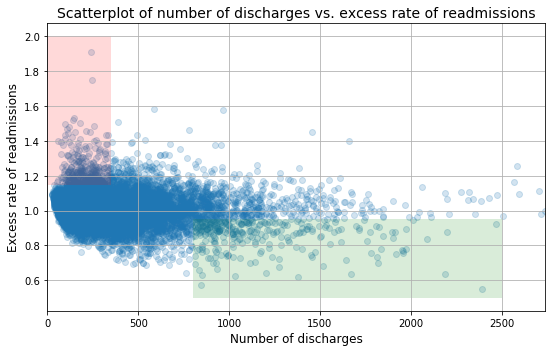

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Further Analysis

A. Are the above analysis and recommendations reasonable? 
   
B. Provide support for recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


****

###  PART A.

<li> I would agree the initial observations based on the plot in the original analysis.

In [5]:
clean_hospital_read_df.head(100)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]

In [7]:
np.mean(small['Excess Readmission Ratio'])

1.0226183501683501

In [8]:
np.mean(large['Excess Readmission Ratio'])

0.9783354211663067

In [9]:
len(small[small['Excess Readmission Ratio']>1])/len(small)

0.5918045705279747

In [10]:
len(large[large['Excess Readmission Ratio']>1])/len(large)

0.4449244060475162

<li> Most of the Statistics in the original analysis is correct except that in hospitals/facilities with number of discharges < 100, 59%(not 63%) have excess readmission rate greater than 1.                                                                                                                             

<li> The conclusions and the recommendations in the original analysis seem to be correct. But further analysis should be done before jumping to conclusions.

## PART B.


<li> For further statistical analysis, I will use a simple linear regression model to test if 'Number of Discharges' and 'Excess Readmission Ratio' are linearly correlated. This can be done by using the statsmodel package in Python. As we can see from below the clean_hospital_read_df dataframe still contains some records where Excess_Readmission_Ratio is empty.

In [11]:
clean_hospital_read_df2 = clean_hospital_read_df.rename(index=str, columns={"Number of Discharges": "Number_of_Discharges", 
                                                                            "Excess Readmission Ratio": "Excess_Readmission_Ratio"})
clean_hospital_read_df2.head()

,Hospital Name,Provider Number,State,Measure Name,Number_of_Discharges,Footnote,Excess_Readmission_Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [12]:
clean_hospital_read_df2 = clean_hospital_read_df2[clean_hospital_read_df2.Excess_Readmission_Ratio>=0]
clean_hospital_read_df2 = clean_hospital_read_df2[clean_hospital_read_df2.Number_of_Discharges>=0]

In [13]:
clean_hospital_read_df2.head()

,Hospital Name,Provider Number,State,Measure Name,Number_of_Discharges,Footnote,Excess_Readmission_Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


<li> Now fit a linear model with Number_of_Dicharges being the dependent variable and Excess_Readmission_Ratio being the independent variable. 

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('Number_of_Discharges ~ Excess_Readmission_Ratio', clean_hospital_read_df2).fit()
print(m.summary())

                             OLS Regression Results                             
Dep. Variable:     Number_of_Discharges   R-squared:                       0.009
Model:                              OLS   Adj. R-squared:                  0.009
Method:                   Least Squares   F-statistic:                     110.1
Date:                  Thu, 14 Feb 2019   Prob (F-statistic):           1.22e-25
Time:                          20:43:05   Log-Likelihood:                -82165.
No. Observations:                 11497   AIC:                         1.643e+05
Df Residuals:                     11495   BIC:                         1.643e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

### 1. The null hypothesis is the coefficient beta1 = 0 in the linear model "Number of Dicharges = beta0 + beta1 * Excess_Readmission_Ratio". Under the null hypothesis, beta1_hat/SE(Excess_Readmission_Ratio) follows a t-distribution, where beta1 is the fitted coefficient of Excess_Readmission_Ratio: -326.9973 and SE stands for the standard error(std err = 31.165 from the table).  

### 2. The p-value is zero.

### 3.At a significance level of \alpha = 0.01, we reject the null hypothesis that the coefficient of Excess_Readmission_Rate, beta1 is zero. 

### 4. This means there exists statistical significance that Number_of_Discharges and Excess_Readmission_Ratio have a negative linear relation. Practical Significance means the higher the number of discharges, the lower the excess readmission ratio. The statistical significance and the partical significance indicates the same thing but the former states the conclusion in a quantative way while the latter explains the conclusion in natural language. 

### 5.The scatter plot has the advantage of preserving the data pattern and display it in the most original way. The red and green rectangles help visualizing the extreme values. The disadvantage of the scatterplot is the audiences can only depend on personal feelings how the two features are related. A linear regression plot is one way to improve on the visualization. This is done below.

C:\Anaconda\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


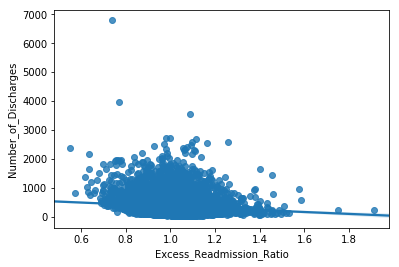

In [15]:
import seaborn as sns
sns.regplot(y="Number_of_Discharges", x="Excess_Readmission_Ratio", data=clean_hospital_read_df2, fit_reg = True)

C:\Anaconda\envs\snowflakes\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


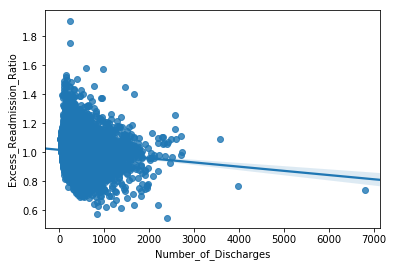

In [16]:
sns.regplot(y="Excess_Readmission_Ratio", x="Number_of_Discharges", data=clean_hospital_read_df2, fit_reg = True)

### Recommendation: My recommendation to a client would be look for hospitals/fercilities with high number of discharges to potentially avoid a hospital readmission.